## Análise Exploratória Primeiro e Segundo Teste ## 

**Contexto:** As escolas adotam uma forma de avaliar o conhecimento dos alunos realizando um teste antes do ano letivo e um teste final após a realização de todo o percuso do curso. Os alunos performam este teste em um aplicativo disponibilizado pelas escolas. 

**Objetivo:** Compreender as variáveis disponíveis e suas distribuições 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
# plot size
plt.rcParams["figure.figsize"] = (15,5) 

In [3]:
#upload data
df = pd.read_csv('data_test.csv')

In [4]:
#checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64170 entries, 0 to 64169
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   student_id      64170 non-null  int64  
 1   place           64170 non-null  object 
 2   curso_id        64170 non-null  int64  
 3   first_test      64170 non-null  object 
 4   question_id     64170 non-null  int64  
 5   correct_first   64170 non-null  int64  
 6   second_test     64170 non-null  object 
 7   correct_second  64170 non-null  float64
 8   date_first      64170 non-null  object 
 9   date_second     64170 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.9+ MB


1) **student_id** - identificador único, dado categórico <br>
2) **place** - unidade em que o aluno está matriculado, dado categórico<br>
3) **curso_id** - curso em que o aluno está matriculado, dado categórico<br>
4) **first_test** - classificação se o aluno realizou o primeiro teste ou não, dado categórico<br>
5) **question_id** - identificador único da questão que o aluno respondeu, dado categórico<br>
6) **correct_first** - resposta correta ou não dada pelo aluno, dado categórico<br>
7) **second_test** - classificação se o aluno realizou o segundo teste ou não, dado categórico<br>
8) **correct_second** - resposta correta ou não dada pelo aluno, dado categórico<br>
9) **date_first** - data em que foi realizado o primeiro teste<br>
10) **date_second** - data em que foi realizado o segundo teste<br>

In [5]:
#Total students
df['student_id'].nunique()

2458

In [6]:
#Total schools
df['place'].nunique()

677

In [7]:
#period students did first test
df['date_first'].min(), df['date_first'].max()

('2021-01-03', '2022-11-29')

In [8]:
#period students did second test
df['date_second'].min(), df['date_second'].max()

('2021-01-12', '2022-11-30')

### Observando Total de Alunos por Escola que realizaram os dois testes ###

In [9]:
df_totalstudents = pd.DataFrame(df.groupby(df['place'])['student_id'].nunique()).reset_index().rename(
    columns={'student_id':'total_students'}).sort_values(by='total_students', ascending=False)

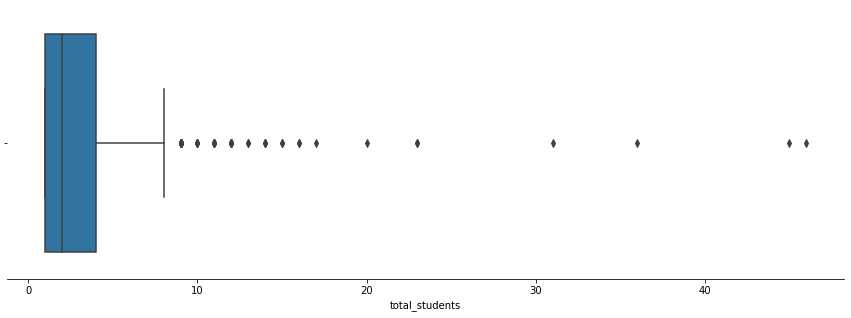

In [10]:
sns.boxplot(data=df_totalstudents, x='total_students')
sns.despine(left=True);

In [11]:
df_totalstudents['total_students'].describe()

count    677.000000
mean       3.633678
std        4.191982
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       46.000000
Name: total_students, dtype: float64

Notamos que 50% das escolas têm até 2 alunos que realizaram os testes

In [12]:
df_totalstudents['total_students'].value_counts(normalize=True)[0:10].sum()

0.9571639586410635

In [13]:
df_totalstudents['total_students'].value_counts(normalize=True)

1     0.317578
2     0.202363
3     0.128508
4     0.106352
5     0.070901
6     0.048744
9     0.028065
8     0.023634
7     0.019202
12    0.011817
11    0.010340
10    0.007386
14    0.004431
13    0.002954
15    0.002954
16    0.002954
23    0.002954
45    0.001477
17    0.001477
20    0.001477
31    0.001477
36    0.001477
46    0.001477
Name: total_students, dtype: float64

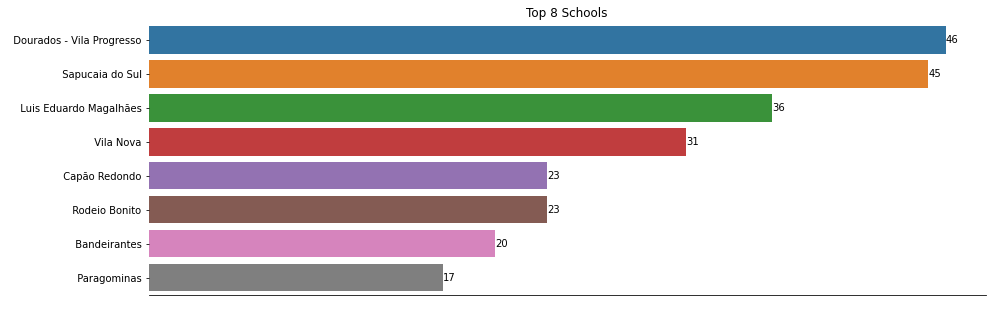

In [14]:
# top 8 schools with more students who has done the test
ax=sns.barplot(data=df_totalstudents[0:8], y='place', x='total_students')
ax.set(title='Top 8 Schools', ylabel='', xticks=[], xlabel=' ')
ax.bar_label(ax.containers[0])
sns.despine(left=True);

### Observando Total de Alunos por  curso ID que realizaram os  testes ###

In [15]:
df['student_id'].nunique()

2458

In [16]:
 df_totalcurso = pd.DataFrame(df.groupby(df['curso_id'])['student_id'].nunique()).reset_index().rename(
    columns={'student_id':'total_students'}).sort_values(by='total_students', ascending=False).reset_index(
 drop=True)

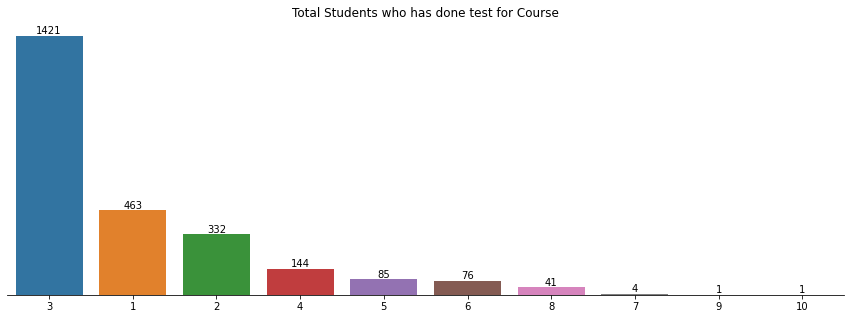

In [17]:
ax=sns.barplot(data=df_totalcurso, x='curso_id', y='total_students',order=[3,1,2,4,5,6,8,7,9,10])
ax.set(title='Total Students who has done test for Course', ylabel='', yticks=[], xlabel=' ')
ax.bar_label(ax.containers[0])
sns.despine(left=True);

### Entendimentos: ###

* Notamos que apenas 25% das escolas tiveram mais de 4 alunos realizando os testes, importante compreender com as escolas o porquê de tão baixa adoção.
* Quando observamos testes realizados por curso, observamos que o curso 3 concentra mais de 50% dos estudantes. 

Dado que temos mais informações com a categorização por curso, é interessante analisarmos se há gap no percentual de acerto e erro quando comparamos as respostas do primeiro teste com os do segundo para o mesmo aluno. Nossa hipótese é que os alunos tem ganho percentual de aprendizagem quando comparamos o resultado do primeiro teste com o do segundo